In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import keras
import tensorflow as tf 
from tensorflow import keras
from google.colab import drive
from keras.models import Sequential
from sklearn.metrics import ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense,BatchNormalization,SpatialDropout2D,GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50,VGG16,InceptionV3
from keras.layers import ReLU
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras import backend as K
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [3]:
path='/content/drive/MyDrive/softC/Project/chest_xray/'

In [4]:
#Preprocessing the Training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        path+'train',
        target_size=(128,128),
        batch_size=16 ,
        class_mode='binary')


#Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
       path+'test',
        target_size=(128,128),
        batch_size=1,
        class_mode='binary')



val_datagen = ImageDataGenerator(rescale = 1./255)

val_set = test_datagen.flow_from_directory(
       path+'val',
        target_size=(128,128),
        batch_size=1,
        class_mode='binary')

Found 5132 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Recall(name='f1 score')
    ]

In [6]:
#Initialising the CNN
cnn = tf.keras.models.Sequential()

#Layers

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128, 3])) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(SpatialDropout2D(0.1))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.5))

cnn.add(tf.keras.layers.Flatten()) #Step 3 - Flattening
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #Step 4 - Full Connection
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #Step 4 - Full Connection
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Step 5 - Output Layer

#Compiling the CNN
adam=keras.optimizers.Adam(learning_rate=0.01)
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [METRICS])

#Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 64, 64, 32)       0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [8]:
cnn1 = cnn.fit(
        training_set, steps_per_epoch=320, epochs=25, validation_data=val_set, validation_steps=39)

Epoch 1/25
320/320 [==============================] - 80s 251ms/step - loss: 0.5971 - accuracy: 0.7316 - precision: 0.7465 - recall: 0.9702 - f1 score: 0.9702 - val_loss: 0.6950 - val_accuracy: 0.5897 - val_precision: 0.5897 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 2/25
320/320 [==============================] - 79s 246ms/step - loss: 0.5701 - accuracy: 0.7373 - precision: 0.7470 - recall: 0.9801 - f1 score: 0.9801 - val_loss: 0.7429 - val_accuracy: 0.4615 - val_precision: 0.4615 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 3/25
320/320 [==============================] - 77s 240ms/step - loss: 0.5316 - accuracy: 0.7455 - precision: 0.7559 - recall: 0.9738 - f1 score: 0.9738 - val_loss: 0.8046 - val_accuracy: 0.5128 - val_precision: 0.5128 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 4/25
320/320 [==============================] - 75s 235ms/step - loss: 0.4799 - accuracy: 0.7625 - precision: 0.7845 - recall: 0.9403 - f1 score: 0.9403 - val_loss: 0.5520 - val_accuracy:

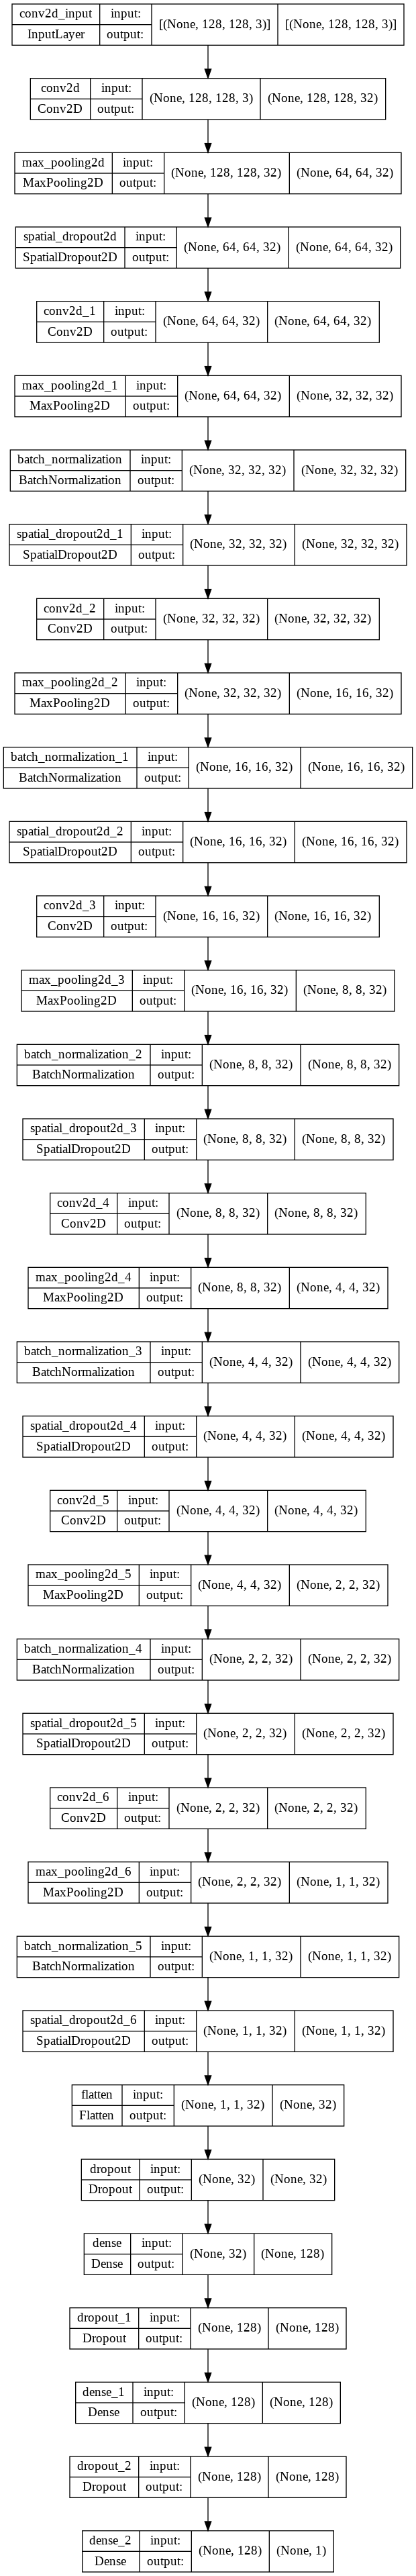

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(cnn,to_file="pneumonia.png",show_shapes=True)

[[ 84 150]
 [118 272]]


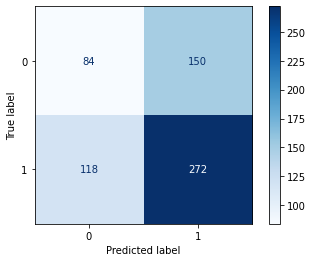

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
pred4 = cnn.predict(test_set)

print(confusion_matrix(test_set.classes, pred4 > 0.5))
disp = ConfusionMatrixDisplay(confusion_matrix(test_set.classes, pred4 > 0.5))

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Preprocessing the Training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        path+'train',
        target_size=(180,180),
        batch_size=8 ,
        class_mode='binary')


#Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
       path+'test',
        target_size=(180,180),
        batch_size=1,
        class_mode='binary')



val_datagen = ImageDataGenerator(rescale = 1./255)

val_set = test_datagen.flow_from_directory(
       path+'val',
        target_size=(180,180),
        batch_size=1,
        class_mode='binary')

Found 5223 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
num_pneumonia = 3876
num_normal = 1342
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [12]:
#from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(128,128,3), include_top=False, weights='imagenet')


94781440/94765736 [==============================] - 1s 0us/step


In [13]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [14]:
resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [17]:
r = resnet_model.fit(training_set,
          epochs=13,
          validation_data=val_set,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)
#cnn1 = cnn.fit_generator(
     #   training_set, steps_per_epoch=326, epochs=10, validation_data=test_set, validation_steps=39)

Epoch 1/13
100/100 [==============================] - 27s 269ms/step - loss: 0.0393 - accuracy: 0.9688 - precision: 0.9886 - recall: 0.9683 - f1 score: 0.9683 - val_loss: 0.0939 - val_accuracy: 0.9200 - val_precision: 1.0000 - val_recall: 0.8750 - val_f1 score: 0.8750
Epoch 2/13
100/100 [==============================] - 27s 265ms/step - loss: 0.0254 - accuracy: 0.9762 - precision: 0.9930 - recall: 0.9742 - f1 score: 0.9742 - val_loss: 0.0852 - val_accuracy: 0.9600 - val_precision: 1.0000 - val_recall: 0.8750 - val_f1 score: 0.8750
Epoch 3/13
100/100 [==============================] - 26s 263ms/step - loss: 0.0321 - accuracy: 0.9781 - precision: 0.9948 - recall: 0.9755 - f1 score: 0.9755 - val_loss: 0.1113 - val_accuracy: 0.9200 - val_precision: 1.0000 - val_recall: 0.8462 - val_f1 score: 0.8462
Epoch 4/13
100/100 [==============================] - 27s 264ms/step - loss: 0.0195 - accuracy: 0.9856 - precision: 0.9948 - recall: 0.9855 - f1 score: 0.9855 - val_loss: 0.0793 - val_accuracy:

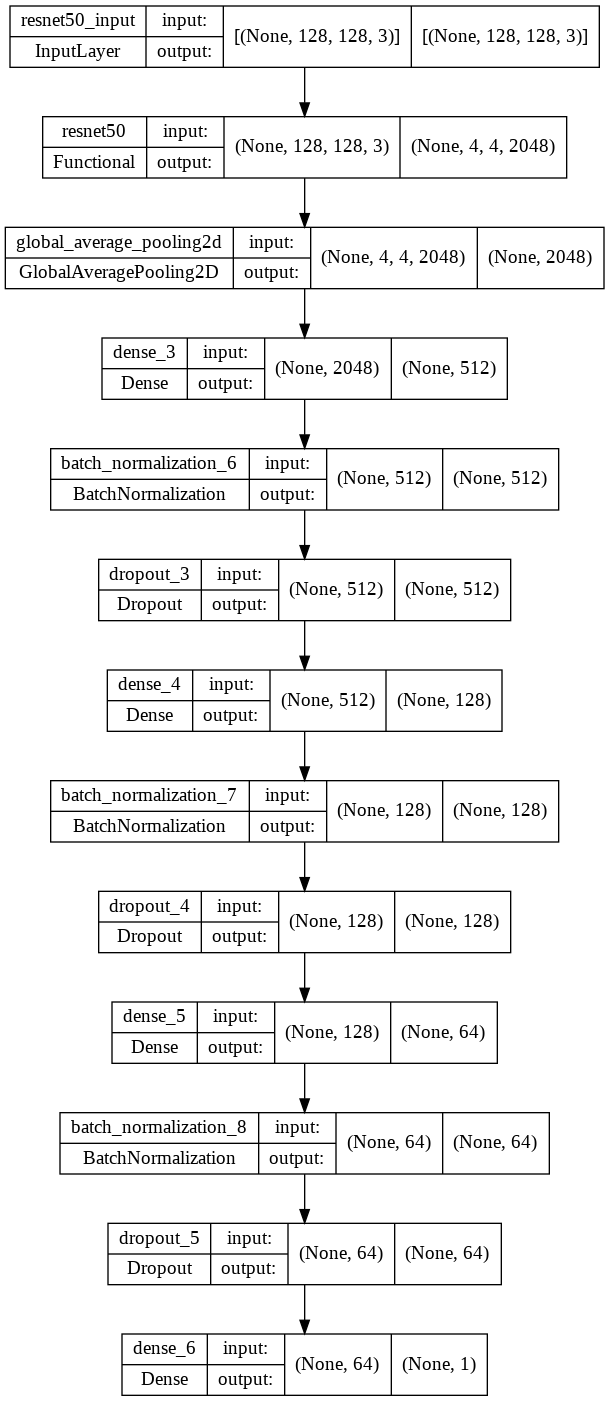

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(resnet_model,to_file="resnet.png",show_shapes=True)

[[ 99 135]
 [147 243]]


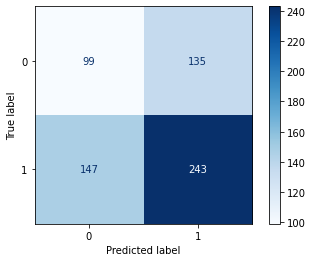

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
pred = resnet_model.predict(test_set)

print(confusion_matrix(test_set.classes, pred > 0.5))
disp = ConfusionMatrixDisplay(confusion_matrix(test_set.classes, pred > 0.5))

disp.plot(cmap=plt.cm.Blues)
plt.show()

**VGG16**

In [22]:
vgg16_base_model = VGG16(input_shape=(128,128,3),include_top=False,weights='imagenet')
vgg16_base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [23]:
vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [24]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)
#cnn1 = cnn.fit(
       # training_set, steps_per_epoch=326, epochs=25, validation_data=test_set, validation_steps=39)

In [26]:
vgg = vgg16_model.fit(
    training_set, epochs=13, validation_data=val_set,class_weight=class_weight, steps_per_epoch=320, validation_steps=25)

Epoch 1/13
320/320 [==============================] - 81s 252ms/step - loss: 0.0567 - accuracy: 0.9480 - precision: 0.9842 - recall: 0.9455 - f1 score: 0.9455 - val_loss: 0.0733 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 2/13
320/320 [==============================] - 80s 250ms/step - loss: 0.0507 - accuracy: 0.9523 - precision: 0.9869 - recall: 0.9487 - f1 score: 0.9487 - val_loss: 0.1510 - val_accuracy: 0.9200 - val_precision: 0.8333 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 3/13
320/320 [==============================] - 81s 251ms/step - loss: 0.0516 - accuracy: 0.9537 - precision: 0.9864 - recall: 0.9511 - f1 score: 0.9511 - val_loss: 0.1323 - val_accuracy: 0.9600 - val_precision: 0.9412 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 4/13
320/320 [==============================] - 81s 253ms/step - loss: 0.0523 - accuracy: 0.9548 - precision: 0.9851 - recall: 0.9539 - f1 score: 0.9539 - val_loss: 0.6532 - val_accuracy:

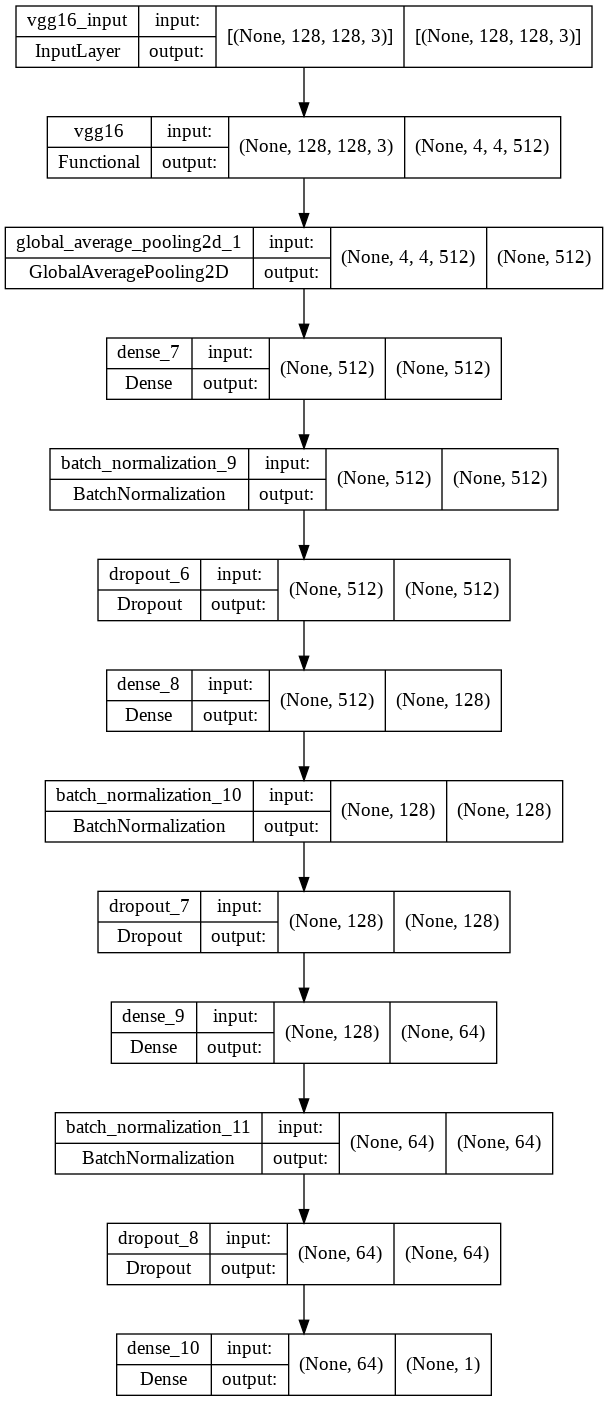

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(vgg16_model,to_file="vgg.png",show_shapes=True)

[[ 70 164]
 [102 288]]


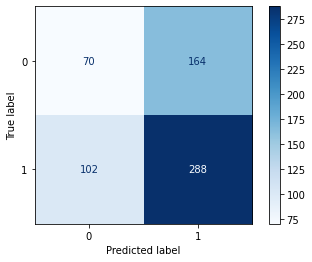

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
pred1 = vgg16_model.predict(test_set)

print(confusion_matrix(test_set.classes, pred1 > 0.5))
disp = ConfusionMatrixDisplay(confusion_matrix(test_set.classes, pred1 > 0.5))

disp.plot(cmap=plt.cm.Blues)
plt.show()

**InceptionNet**

In [30]:
inception_base_model = InceptionV3(input_shape=(128,128,3),include_top=False,weights='imagenet')
inception_base_model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_12 (BatchN  (None, 63, 63, 32)  96          ['conv2d_7[0][0]']               
 ormalization)                                                                                    
                      

In [31]:
    inception_model = tf.keras.Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.SGD(learning_rate=0.01)
    inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [33]:
inception = inception_model.fit(
    training_set, steps_per_epoch=320, epochs=12, validation_data=val_set, validation_steps=25)

Epoch 1/12
320/320 [==============================] - 83s 259ms/step - loss: 0.0991 - accuracy: 0.9697 - precision: 0.9796 - recall: 0.9799 - f1 score: 0.9799 - val_loss: 0.2110 - val_accuracy: 0.8800 - val_precision: 0.8333 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 2/12
320/320 [==============================] - 81s 254ms/step - loss: 0.0749 - accuracy: 0.9775 - precision: 0.9856 - recall: 0.9843 - f1 score: 0.9843 - val_loss: 0.0270 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 3/12
320/320 [==============================] - 82s 255ms/step - loss: 0.0623 - accuracy: 0.9832 - precision: 0.9882 - recall: 0.9893 - f1 score: 0.9893 - val_loss: 0.0724 - val_accuracy: 0.9600 - val_precision: 0.9286 - val_recall: 1.0000 - val_f1 score: 1.0000
Epoch 4/12
320/320 [==============================] - 81s 253ms/step - loss: 0.0979 - accuracy: 0.9760 - precision: 0.9848 - recall: 0.9830 - f1 score: 0.9830 - val_loss: 0.0672 - val_accuracy:

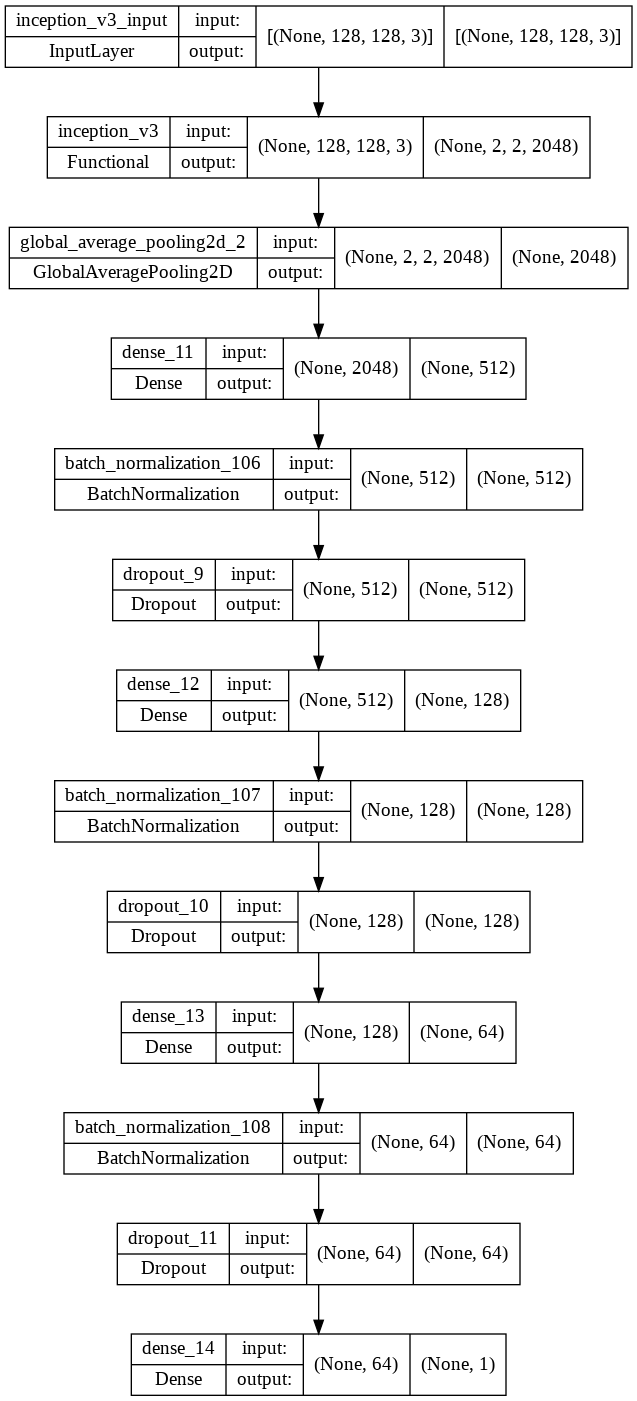

In [34]:
plot_model(inception_model,to_file="inception.png",show_shapes=True)

[[ 91 143]
 [130 260]]


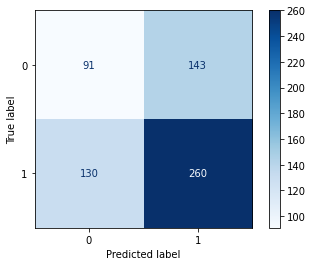

In [35]:
#from sklearn.metrics import confusion_matrix, classification_report
#import matplotlib.pyplot as plt
pred2 = inception_model.predict(test_set)

print(confusion_matrix(test_set.classes, pred2 > 0.5))
disp = ConfusionMatrixDisplay(confusion_matrix(test_set.classes, pred2 > 0.5))

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 24))

# plt.subplot(4, 1, 1)
# plt.plot(cnn1.history['loss'], label='Loss')
# plt.plot(cnn1.history['val_loss'], label='Test_Loss')
# plt.plot(cnn1.history['accuracy'], label='Accuracy')
# plt.plot(cnn1.history['val_accuracy'], label='Test_Accuracy')
# plt.legend()
# plt.title('CNN Loss & Accuracy Evolution')

# plt.subplot(4, 1, 2)
# plt.plot(r.history['loss'], label='Loss')
# plt.plot(r.history['val_loss'], label='Val_Loss')
# plt.plot(r.history['accuracy'], label='Accuracy')
# plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
# plt.legend()
# plt.title('ResNet Loss & Accuracy Evolution')



# plt.subplot(4, 1,3)
# plt.plot(vgg.history['loss'], label='Loss')
# plt.plot(vgg.history['val_loss'], label='Val_Loss')
# plt.plot(vgg.history['accuracy'], label='Accuracy')
# plt.plot(vgg.history['val_accuracy'], label='Val_Accuracy')
# plt.legend()
# plt.title('VGG16 Loss & Accuracy Evolution')


# plt.subplot(4, 1,4)
# plt.plot(inception.history['loss'], label='Loss')
# plt.plot(inception.history['val_loss'], label='Val_Loss')
# plt.plot(inception.history['accuracy'], label='Accuracy')
# plt.plot(inception.history['val_accuracy'], label='Val_Accuracy')
# plt.legend()
# plt.title('InceptionNet Loss & Accuracy Evolution')


Text(0.5, 1.0, 'CNN Loss & Accuracy Evolution')

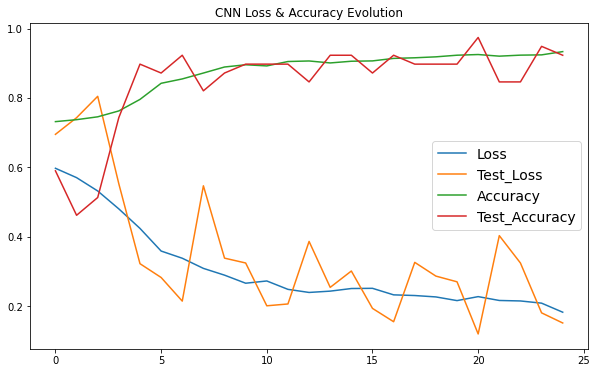

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

#plt.subplot(2, 1, 1)
plt.plot(cnn1.history['loss'], label='Loss')
plt.plot(cnn1.history['val_loss'], label='Test_Loss')
plt.plot(cnn1.history['accuracy'], label='Accuracy')
plt.plot(cnn1.history['val_accuracy'], label='Test_Accuracy')
plt.legend(fontsize=14)
plt.title('CNN Loss & Accuracy Evolution')


Text(0.5, 1.0, 'ResNet Loss & Accuracy Evolution')

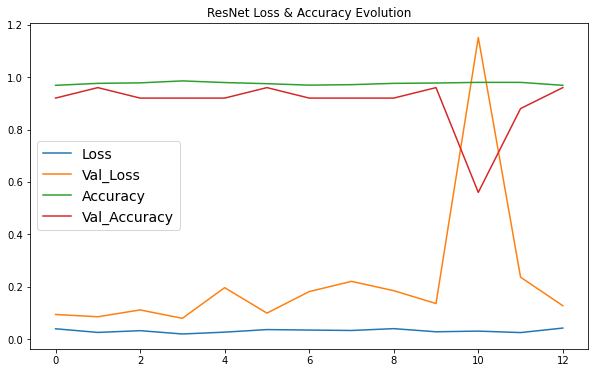

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
#plt.subplot(5, 1, 2)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend(fontsize=14)
plt.title('ResNet Loss & Accuracy Evolution')

Text(0.5, 1.0, 'VGG16 Loss & Accuracy Evolution')

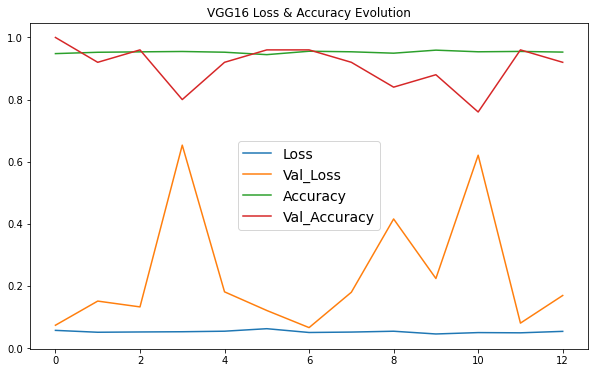

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(vgg.history['loss'], label='Loss')
plt.plot(vgg.history['val_loss'], label='Val_Loss')
plt.plot(vgg.history['accuracy'], label='Accuracy')
plt.plot(vgg.history['val_accuracy'], label='Val_Accuracy')
plt.legend(fontsize=14)
plt.title('VGG16 Loss & Accuracy Evolution')


Text(0.5, 1.0, 'InceptionNet Loss & Accuracy Evolution')

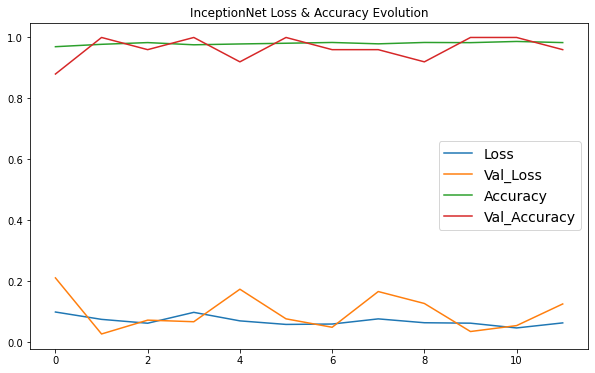

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
#plt.subplot(5, 1,4)
plt.plot(inception.history['loss'], label='Loss')
plt.plot(inception.history['val_loss'], label='Val_Loss')
plt.plot(inception.history['accuracy'], label='Accuracy')
plt.plot(inception.history['val_accuracy'], label='Val_Accuracy')
plt.legend(fontsize=14)
plt.title('InceptionNet Loss & Accuracy Evolution')